In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# 1- Data Visualization and Exploration

 1.1 Print 2 rows

In [73]:
df=pd.read_csv("Anomaly.csv")

print("First two rows of file:")
df.head(2)

First two rows of file:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


1.2 Comment on class imbalance with appropriate visualization method.

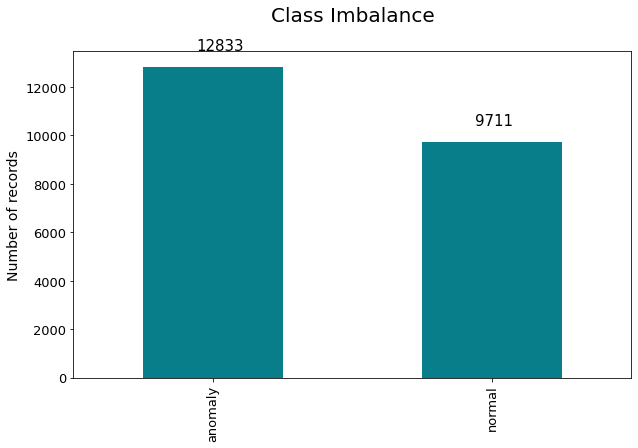

In [74]:
ax = df['class'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Class Imbalance', size=20, pad=30)
ax.set_ylabel('Number of records', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Looking at the above distribution it's clear that the data is evenly spread. The anomaly records are slightly higher than the normal records. It is also clear that Anomaly records which should ideally be far lower are much higher. 

1.3 Provide appropriate visualizations to get an insight about the dataset

(array([18880.,     0.,     0.,     0.,     0.,  1043.,     0.,     0.,
            0.,  2621.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

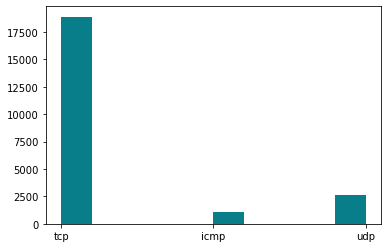

In [75]:
plt.hist(df['protocol_type'], color='#087E8B')


In [76]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
jjkk=df['src_bytes'].quantile(0.87)
len(df[df['src_bytes']>=jjkk])


2970

(array([3.8500e+03, 1.4875e+04, 7.7300e+02, 2.0130e+03, 6.6900e+02,
        7.3000e+01, 2.4900e+02, 1.5000e+01, 2.1000e+01, 6.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

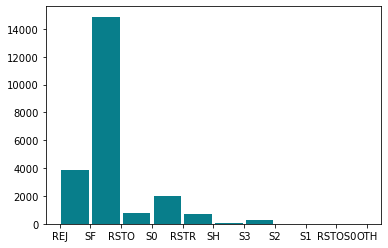

In [78]:
plt.hist(df['flag'], rwidth=0.9 ,color='#087E8B')


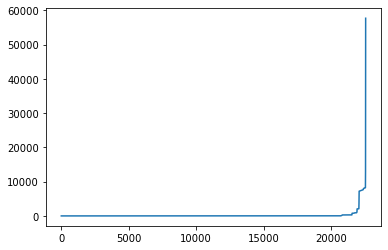

In [79]:
duration= df['duration']
y = np.sort(duration)
x = np.arange(22544)

plt.plot(x, y)

In [80]:
df1=df[["duration","protocol_type","service","flag","src_bytes","dst_bytes"]]

In [81]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


visualization for correlational

<AxesSubplot:>

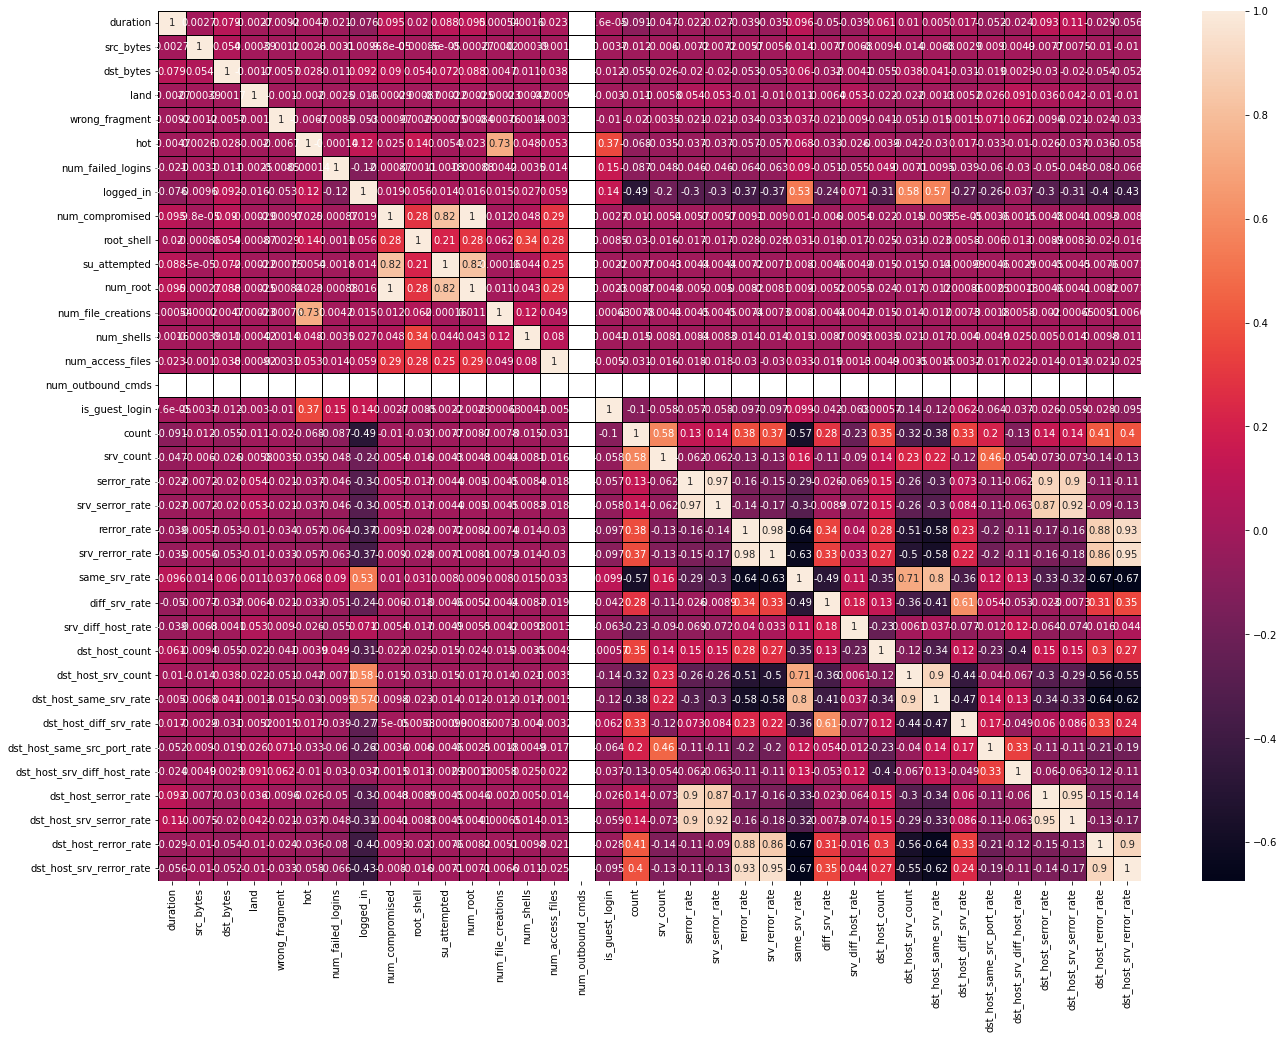

In [82]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=1)

as we see above there are features that have high priority than other  

In [83]:
corr_matrix = df.corr()

correlational analysis

In [84]:
corr_features = set()
corr_threshold=0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print(corr_features)


{'srv_serror_rate', 'num_root', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'su_attempted', 'dst_host_srv_serror_rate', 'srv_rerror_rate'}


drop the columns which are correlated

In [85]:
drop_list=list(corr_features)
df.drop(drop_list, axis=1,inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  num_file_creatio

In [87]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,0.102924,0.238463,0.740345,0.094074,0.098110,193.863965,140.752663,0.090540,0.132261,0.019638
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,0.295367,0.416118,0.412496,0.259138,0.253545,94.042593,111.786948,0.220717,0.306268,0.085394
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.010000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.250000,1.000000,0.060000,0.000000,255.000000,255.000000,0.060000,0.030000,0.010000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


## 2-Data Pre-processing and cleaning

### 2.1 Drop Null valuse and outliers

In [88]:
df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
rerror_rate                     0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count                 13
dst_host_srv_count             12
dst_host_diff_srv_rate          0
dst_host_same_src_port_rate     0
dst_host_srv_d

In [89]:
df.dropna(inplace= True)

#### check outlires and drop it

In [90]:
anomaly=df[df['class']=='anomaly']
normal=df[df['class']=='normal']
len(anomaly) + len(normal)

22530

 check outlires for normal class

In [91]:
normal.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'class'],
      dtype='object')

In [92]:
normal.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,9706.000000,9.706000e+03,9.706000e+03,9706.0,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,...,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000
mean,47.092623,2.531697e+03,4.166958e+03,0.0,0.012982,0.051411,0.001133,0.756954,0.189367,0.001855,...,0.003183,0.008346,0.982468,0.017032,0.121355,155.816608,216.999176,0.026159,0.121721,0.018207
std,1192.762136,8.509490e+04,3.138784e+04,0.0,0.188916,1.258842,0.054652,0.428944,10.894860,0.043026,...,0.045198,0.090327,0.115111,0.113616,0.245076,102.261014,76.534885,0.113219,0.264652,0.043277
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.810000e+02,1.662500e+02,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,45.000000,240.000000,0.000000,0.000000,0.000000
50%,0.000000,2.360000e+02,7.400000e+02,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,188.000000,255.000000,0.000000,0.010000,0.000000
75%,0.000000,3.080000e+02,2.726250e+03,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.130000,255.000000,255.000000,0.000000,0.060000,0.030000
max,54451.000000,6.291668e+06,1.345927e+06,0.0,3.000000,101.000000,3.000000,1.000000,796.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


In [93]:
normal[['num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login',
       'count', 'srv_count']].describe()

,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count
count,9706.000000,9706.0,9706.000000,9706.0,9706.000000,9706.000000,9706.000000
mean,0.010921,0.0,0.005667,0.0,0.004533,37.474964,40.818051
std,1.015432,0.0,0.080370,0.0,0.067180,102.012592,103.065217
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.0,0.000000,2.000000,3.000000
50%,0.000000,0.0,0.000000,0.0,0.000000,6.000000,9.000000
75%,0.000000,0.0,0.000000,0.0,0.000000,16.000000,20.000000
max,100.000000,0.0,3.000000,0.0,1.000000,511.000000,511.000000


<AxesSubplot:ylabel='duration'>

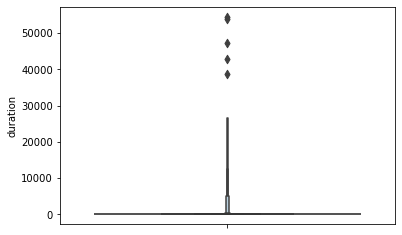

In [94]:
sns.boxenplot(y='duration',data=normal)

In [95]:
#normal.drop(normal[normal['duration']>10].index,inplace=True)
normal.drop(normal[normal['duration']>30000].index,inplace=True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='num_compromised'>

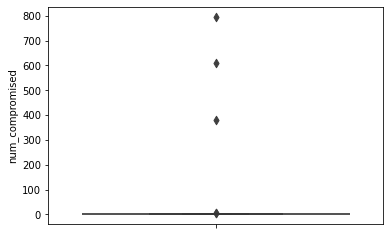

In [96]:
sns.boxenplot(y='num_compromised',data=normal)

In [97]:
#normal.drop(normal[normal['num_compromised']>0].index,inplace=True)
normal.drop(normal[normal['num_compromised']>10].index,inplace=True)


c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='src_bytes'>

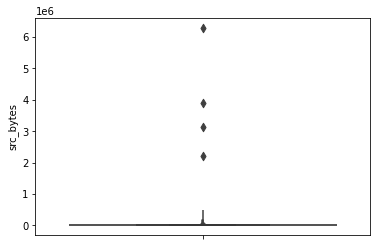

In [98]:
sns.boxenplot(y='src_bytes' ,data=normal)

Comment for the action

In [99]:
#normal.drop(normal[normal['src_bytes']>10000].index,inplace=True)
normal.drop(normal[normal['src_bytes']>0.3e+06].index,inplace=True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='dst_bytes'>

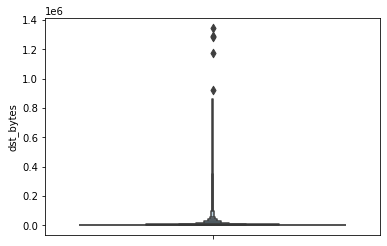

In [100]:
sns.boxenplot(y='dst_bytes',data=normal)

In [101]:
#normal.drop(normal[normal['dst_bytes']>10000].index,inplace=True)
normal.drop(normal[normal['dst_bytes']>50000].index,inplace=True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='dst_bytes'>

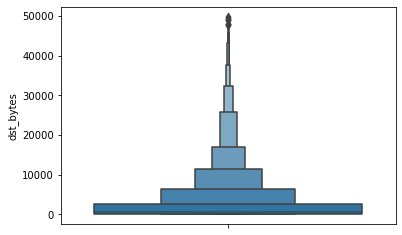

In [102]:
sns.boxenplot(y='dst_bytes',data=normal)

 check outlires for anomaly class

In [103]:
anomaly.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,12824.000000,1.282400e+04,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,...,12824.000000,12824.000000,12824.000000,12824.00000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000
mean,349.016376,1.635395e+04,460.290237,0.000546,0.004991,0.146210,0.037196,0.204070,0.067452,0.002885,...,0.178290,0.412658,0.557047,0.15240,0.080410,222.655802,83.054975,0.139233,0.140225,0.020662
std,1537.865055,6.224150e+05,6324.383206,0.023358,0.093324,0.558436,0.192112,0.403036,1.750317,0.053639,...,0.372046,0.477098,0.459325,0.31675,0.258197,75.493862,98.959038,0.265264,0.334083,0.106416
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.060000,0.00000,0.000000,255.000000,7.000000,0.020000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,255.000000,19.000000,0.050000,0.000000,0.000000
75%,0.000000,1.050000e+02,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010000,1.000000,1.000000,0.07000,0.000000,255.000000,177.000000,0.070000,0.010000,0.000000
max,57715.000000,6.282565e+07,511712.000000,1.000000,3.000000,15.000000,4.000000,1.000000,165.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='duration'>

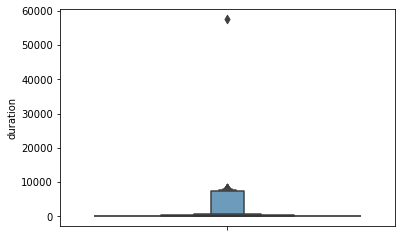

In [104]:
sns.boxenplot(y='duration',data=anomaly)

In [105]:
#anomaly.drop(anomaly[anomaly['duration']>800].index,inplace=True)
anomaly.drop(anomaly[anomaly['duration']>9000].index,inplace=True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='src_bytes'>

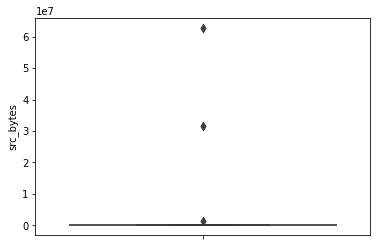

In [106]:
sns.boxenplot(y='src_bytes',data=anomaly)

In [107]:
#anomaly.drop(anomaly[anomaly['src_bytes']>=60000].index,inplace= True)
anomaly.drop(anomaly[anomaly['src_bytes']>=0.2e+07].index,inplace= True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='dst_bytes'>

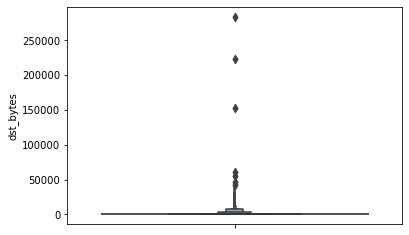

In [108]:
sns.boxenplot(y='dst_bytes',data=anomaly)

In [109]:
#anomaly.drop(anomaly[anomaly['dst_bytes']>800].index,inplace= True)
anomaly.drop(anomaly[anomaly['dst_bytes']>10000].index,inplace= True)


c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='src_bytes'>

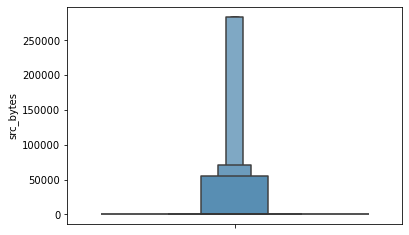

In [110]:
sns.boxenplot(y='src_bytes',data=anomaly)

In [111]:
#anomaly.drop(anomaly[anomaly['src_bytes']>2600].index,inplace=True)
anomaly.drop(anomaly[anomaly['src_bytes']>2600].index,inplace=True)

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [112]:
anomaly.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,...,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000,11712.000000
mean,321.953467,143.793716,66.715249,0.000598,0.005464,0.090676,0.040471,0.149505,0.002476,0.001110,...,0.193751,0.409014,0.515090,0.166670,0.083752,224.546448,72.823002,0.149931,0.137134,0.019805
std,1503.519073,463.631823,252.799485,0.024441,0.097641,0.423027,0.200080,0.356601,0.113524,0.033299,...,0.385294,0.477575,0.458987,0.327639,0.266949,72.552076,92.399838,0.273748,0.331221,0.107641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.050000,0.000000,0.000000,255.000000,6.000000,0.020000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.400000,0.060000,0.000000,255.000000,18.000000,0.060000,0.000000,0.000000
75%,0.000000,30.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022500,1.000000,1.000000,0.070000,0.000000,255.000000,118.000000,0.080000,0.010000,0.000000
max,8233.000000,2599.000000,9336.000000,1.000000,3.000000,7.000000,4.000000,1.000000,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


In [113]:
anomaly[['num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login',
       'count', 'srv_count']].describe()

,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count
count,11712.000000,11712.000000,11712.000000,11712.0,11712.000000,11712.000000,11712.000000
mean,0.004013,0.001281,0.000512,0.0,0.050888,119.487961,24.387210
std,0.101568,0.042327,0.022629,0.0,0.219778,140.293165,79.220992
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,85.000000,3.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,218.000000,13.000000
max,4.000000,2.000000,1.000000,0.0,1.000000,511.000000,511.000000


In [114]:
len(anomaly)+len(normal)

21346

In [115]:
len(anomaly)+len(normal)

21346

In [116]:
data=pd.concat([normal,anomaly])

Deleting all rows where any feature is null

### 2.2 feature engineering

In [117]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,...,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000
mean,184.396889,439.907711,1317.219713,0.000328,0.008901,0.072613,0.022721,0.423358,0.003701,0.001265,...,0.107492,0.228210,0.725994,0.099145,0.100789,193.675536,138.022346,0.094060,0.130267,0.019050
std,1154.574817,4504.588417,4006.853108,0.018106,0.146532,0.903688,0.153964,0.494103,0.130715,0.035543,...,0.301964,0.410594,0.419135,0.265071,0.257970,93.607972,111.687950,0.225199,0.303238,0.084883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.150000,0.000000,0.000000,120.000000,14.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,151.000000,0.020000,0.000000,0.000000
75%,0.000000,250.000000,599.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,0.060000,0.030000,0.010000
max,20741.000000,294812.000000,49759.000000,1.000000,3.000000,101.000000,4.000000,1.000000,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


## One hot encoding

In [118]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.0,1.00,0.00,0.00,134.0,86.0,0.04,0.61,0.02,normal
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.0,1.00,0.00,0.00,155.0,255.0,0.00,0.01,0.03,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.0,1.00,0.00,1.00,255.0,28.0,0.72,0.00,0.00,normal
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.0,1.00,0.00,0.04,151.0,255.0,0.00,0.01,0.03,normal
15,0,tcp,http,SF,350,3610,0,0,0,0,...,0.0,1.00,0.00,0.00,71.0,255.0,0.00,0.01,0.04,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.04,0.06,0.00,255.0,10.0,0.07,0.00,0.00,anomaly
22536,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,1.0,0.14,0.06,0.00,255.0,18.0,0.05,0.00,0.00,anomaly
22537,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.0,1.00,0.00,0.00,255.0,186.0,0.13,0.00,0.00,anomaly
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255.0,255.0,0.00,1.00,0.00,anomaly


In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.0,1.00,0.00,0.00,134.0,86.0,0.04,0.61,0.02,normal
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.0,1.00,0.00,0.00,155.0,255.0,0.00,0.01,0.03,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.0,1.00,0.00,1.00,255.0,28.0,0.72,0.00,0.00,normal
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.0,1.00,0.00,0.04,151.0,255.0,0.00,0.01,0.03,normal
15,0,tcp,http,SF,350,3610,0,0,0,0,...,0.0,1.00,0.00,0.00,71.0,255.0,0.00,0.01,0.04,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.04,0.06,0.00,255.0,10.0,0.07,0.00,0.00,anomaly
22536,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,1.0,0.14,0.06,0.00,255.0,18.0,0.05,0.00,0.00,anomaly
22537,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.0,1.00,0.00,0.00,255.0,186.0,0.13,0.00,0.00,anomaly
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.0,1.00,0.00,0.00,255.0,255.0,0.00,1.00,0.00,anomaly


In [148]:
encode=LabelEncoder()
y=data['class']
y=encode.fit_transform(y)

X=data.drop(['class'],axis=1)
X=pd.get_dummies(X)

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


 Extract  importent features using RandomForest algorithm

c:\Users\Abdulmalik\anaconda3_1\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


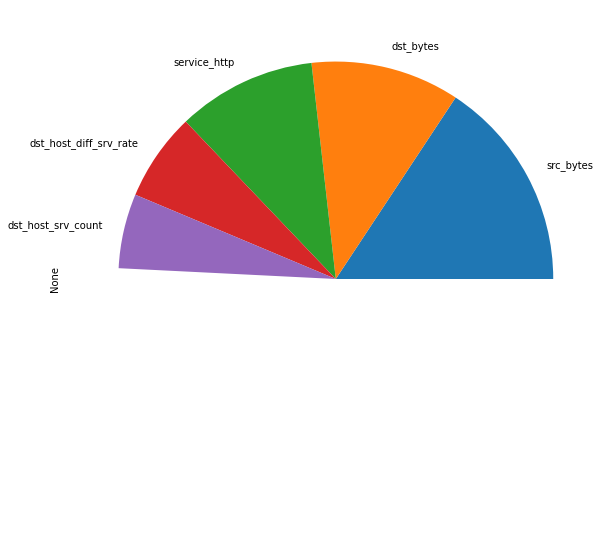

In [149]:
feat = RandomForestClassifier()
feat.fit(X,y)

#Plotting graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(feat.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='pie')
plt.show() 

In [124]:
colom=feat_importances.nlargest(10).to_frame()
X=X[colom.index]

### feature transformation

we use Standardization because the standard deviation in copule of features are very high

In [125]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

# 3. Model Building

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import classification_report

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

1. Split the dataset into training and test sets

In [128]:
from sklearn.model_selection import train_test_split


In [129]:
#yN=data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
model_1_20=GaussianNB()
model_1_20.fit(X_train,y_train)


pred_train=model_1_20.predict(X_train)
#pred_train=(pred_train>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train)*100))

pred=model_1_20.predict(X_test)
#pred=(pred>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,pred)*100))
print(classification_report(y_test,pred))

accuracy Train:  83.94237526352775
accuracy Test:  83.65339578454332
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2328
           1       0.83      0.81      0.82      1942

    accuracy                           0.84      4270
   macro avg       0.84      0.83      0.83      4270
weighted avg       0.84      0.84      0.84      4270



In [130]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
m0000=RandomForestRegressor()
m0000.fit(X_train,y_train)


prein=m0000.predict(X_train)
prein=(prein>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,prein)*100))

prd=m0000.predict(X_test)
prd=(prd>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,prd)*100))


print(classification_report(y_test,prd))

accuracy Train:  99.66034200046849
accuracy Test:  98.61826697892272
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2328
           1       0.98      0.99      0.98      1942

    accuracy                           0.99      4270
   macro avg       0.99      0.99      0.99      4270
weighted avg       0.99      0.99      0.99      4270



In [132]:
X_train

array([[-0.09765998, -0.3287494 , -0.69652406, ..., -0.15252241,
        -0.1476808 , -0.15971352],
       [-0.05392577,  0.12797881,  1.43570059, ..., -0.32775373,
        -0.3740402 , -0.15971352],
       [-0.09765998, -0.3287494 , -0.69652406, ..., -0.2072822 ,
        -0.1476808 , -0.15971352],
       ...,
       [-0.08833594, -0.31826712, -0.69652406, ..., -0.13061849,
        -0.3740402 , -0.15971352],
       [-0.02861765, -0.03824031,  1.43570059, ..., -0.16347437,
        -0.3740402 , -0.15971352],
       [-0.06946584, -0.28532279, -0.69652406, ..., -0.33870569,
        -0.3740402 , -0.15971352]])

In [133]:
#yN=data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
model_1_10=GaussianNB()
model_1_10.fit(X_train,y_train)


pred_train=model_1_10.predict(X_train)
#pred_train=(pred_train>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train)*100))

pred=model_1_10.predict(X_test)
#pred=(pred>0.5)
print("accuracy:  "+str(accuracy_score(y_test,pred)*100))
print(classification_report(y_test,pred))

accuracy Train:  84.21737546197491
accuracy:  83.23185011709602
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1167
           1       0.83      0.80      0.81       968

    accuracy                           0.83      2135
   macro avg       0.83      0.83      0.83      2135
weighted avg       0.83      0.83      0.83      2135



In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
model_2_10=LinearRegression()
model_2_10.fit(X_train,y_train)


pred_train=model_2_10.predict(X_train)
pred_train=(pred_train>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train)*100))

pred=model_2_10.predict(X_test)
pred=(pred>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,pred)*100))


print(classification_report(y_test,pred))

accuracy Train:  85.41460621518921
accuracy Test:  85.71428571428571
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1167
           1       0.91      0.76      0.83       968

    accuracy                           0.86      2135
   macro avg       0.87      0.85      0.85      2135
weighted avg       0.86      0.86      0.86      2135



Hence based on the results above, train 0.8 and test 0.2 approach gives us little better result

In [135]:
from sklearn.model_selection import StratifiedKFold

In [136]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_Linear = []
scores_naive = []
train_Linear = []
train_naive = []

values=[i for i in range(1,6)]


for train_index, test_index in folds.split(X,y):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    m=GaussianNB()
    m.fit(X_train,y_train)
    pred_trainN=m.predict(X_train)
    train_naive.append(accuracy_score(y_train,pred_trainN)*100)

    predTN=m.predict(X_test)
    scores_naive.append(accuracy_score(y_test,predTN)*100)


    mo=BaggingRegressor()
    mo.fit(X_train,y_train)
    pred_train=mo.predict(X_train)
    pred_train=(pred_train>0.5)
    train_Linear.append(accuracy_score(y_train,pred_train)*100)

    predtest=mo.predict(X_test)
    predtest=(predtest>0.5)
    scores_Linear.append(accuracy_score(y_test,predtest)*100)

In [137]:
scores_Linear=np.array(scores_Linear)
scores_Linear.mean()

98.29474074573899

In [138]:
scores_naive=np.array(scores_naive)
scores_naive

array([84.09836066, 84.11806044, 83.93066292, 83.69641602, 84.25860857])

In [139]:
train_Linear=np.array(train_Linear)
train_Linear

array([99.53736238, 99.59594777, 99.61937108, 99.59009194, 99.51982198])

In [140]:
train_naive=np.array(train_naive)
train_naive

array([83.81353947, 84.31808866, 84.27124202, 83.83205481, 83.82619898])

In [141]:
len(scores_Linear)

5

As we se the results of models above, after applaying cross validtion so the best model is Linear Regression 

#### 4.2  underfitting overfitting 

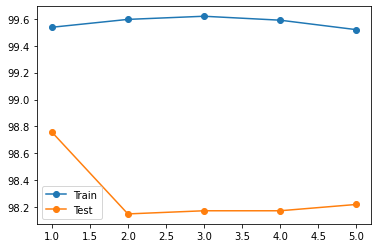

In [142]:
plt.plot(values, train_Linear, '-o', label='Train')
plt.plot(values, scores_Linear, '-o', label='Test')

plt.legend()
plt.show()

as we see above the train and test accuracy in  LinearRegression model are close to each other, so that lead us to say underfitting overfitting there is no 

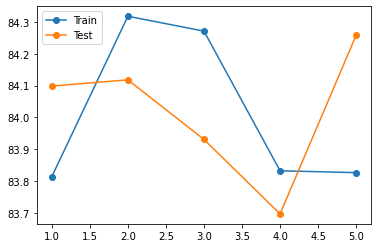

In [143]:
plt.plot(values, train_naive, '-o', label='Train')
plt.plot(values, scores_naive, '-o', label='Test')
plt.legend()
plt.show()

as we see above the train and test accuracy in  naive_bayes model are close to each other, so that lead us to say underfitting overfitting there is no 

In [144]:
from sklearn.linear_model import  Ridge, Lasso


L2 regularization

In [145]:
ridgeR = Ridge(alpha = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=39)
ridgeR.fit(X_train, y_train)
train=ridgeR.predict(X_train)
train=(train>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,train)*100))

test=ridgeR.predict(X_test)
test=(test>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,test)*100))

accuracy Train:  85.4591239166081
accuracy Test:  85.45667447306792


Hence based on the results of L2 regularization there is no positive effect on the model 


L1 regularization

In [146]:
lasso = Lasso(alpha = 1,random_state=42)
lasso.fit(X_train, y_train)
train=lasso.predict(X_train)
train=(train>0.5)
print("accuracy Train:  "+str(accuracy_score(y_train,train)*100))

test=lasso.predict(X_test)
test=(test>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,test)*100))

accuracy Train:  54.91332864839541
accuracy Test:  54.68384074941453


 Hence based on the results oof regularization its effecting negatively on the model so its better not to use it
